In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

# IMPORT


In [ ]:
import_df = pd.DataFrame(columns=['TEU_per_wagon', 'Wagons_per_Train','Starting_Port','Final_Port','Port_Requirement','Total_trains'])

In [ ]:
startP=['Hamad Port','Hamad Port','Hamad Port','Hamad Port','Ruwais Port','Ruwais Port','Ruwais Port','Ruwais Port','Ruwais Port']
finalP=['Dry Port 1','Dry Port 2','Dry Port 3','Dry Port 4','Dry Port 1','Dry Port 2','Dry Port 3','Dry Port 4','Hamad Port']
PRequirement=[440.7534247, 598.1671233, 267.6, 78.70684932, 33.17534247, 45.02191781, 20.14246575, 5.923297671, 14.21917808]

In [ ]:
for j in range(2,4):
  for starting_port, final_port, port_req in zip(startP,finalP,PRequirement):
    for i in range(5,26):
      TEU_per_wagon=j
      Wagons_per_Train=i
      Starting_Port = starting_port
      Final_Port = final_port
      Port_Requirement = port_req

      Total_trains = math.ceil(Port_Requirement/((TEU_per_wagon)*(Wagons_per_Train)))

      data = {'TEU_per_wagon': TEU_per_wagon,
        'Wagons_per_Train': Wagons_per_Train,
        'Starting_Port': Starting_Port,
        'Final_Port': Final_Port,
        'Port_Requirement': Port_Requirement,
        'Total_trains': Total_trains}


      new_df = pd.DataFrame([data])


      import_df = pd.concat([import_df, new_df], ignore_index=True)

In [ ]:
import_df.tail(10)

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
368,3,16,Ruwais Port,Hamad Port,14.219178,1
369,3,17,Ruwais Port,Hamad Port,14.219178,1
370,3,18,Ruwais Port,Hamad Port,14.219178,1
371,3,19,Ruwais Port,Hamad Port,14.219178,1
372,3,20,Ruwais Port,Hamad Port,14.219178,1
373,3,21,Ruwais Port,Hamad Port,14.219178,1
374,3,22,Ruwais Port,Hamad Port,14.219178,1
375,3,23,Ruwais Port,Hamad Port,14.219178,1
376,3,24,Ruwais Port,Hamad Port,14.219178,1
377,3,25,Ruwais Port,Hamad Port,14.219178,1


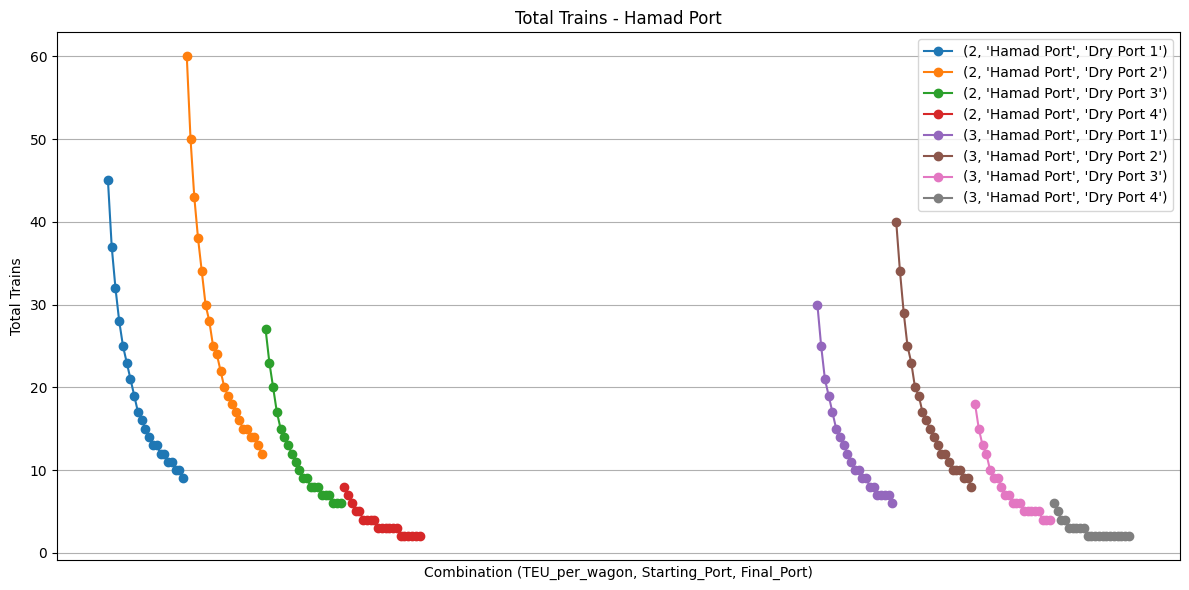

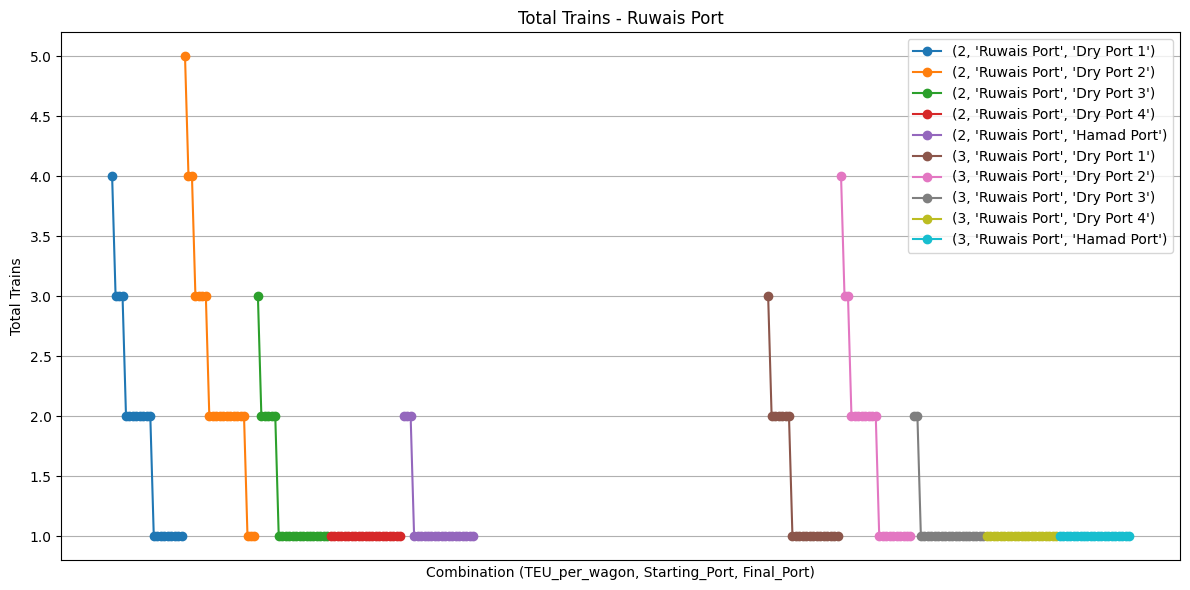

In [ ]:
hamad_df = import_df[import_df['Starting_Port'] == 'Hamad Port']
ruwais_df = import_df[import_df['Starting_Port'] == 'Ruwais Port']


def plot_total_trains(df, title):
    plt.figure(figsize=(12, 6))
    groups = df.groupby(['TEU_per_wagon', 'Starting_Port', 'Final_Port'])
    for name, group in groups:
        plt.plot(group.index, group['Total_trains'], marker='o', linestyle='-', label=name)
    plt.title(title)
    plt.xlabel('Combination (TEU_per_wagon, Starting_Port, Final_Port)')
    plt.ylabel('Total Trains')
    plt.xticks([])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(title+'.jpg')
    plt.show()


plot_total_trains(hamad_df, 'Total Trains - Hamad Port')
plot_total_trains(ruwais_df, 'Total Trains - Ruwais Port')




The two graphs can prove that 3 teus are better than 2 teus per wagon as it reduces the total number of trains required

In [ ]:
hamad_3_df = import_df[(import_df['Starting_Port'] == 'Hamad Port') & (import_df['TEU_per_wagon'] == 3)]
ruwais_3_df = import_df[(import_df['Starting_Port'] == 'Ruwais Port') & (import_df['TEU_per_wagon'] == 3)]

## Hamad Import

In [ ]:
hamad_new = hamad_3_df.groupby('Wagons_per_Train')['Total_trains'].sum().reset_index()
hamad_new

,Wagons_per_Train,Total_trains
0,5,94
1,6,79
2,7,67
3,8,60
4,9,53
5,10,47
6,11,45
7,12,41
8,13,38
9,14,35


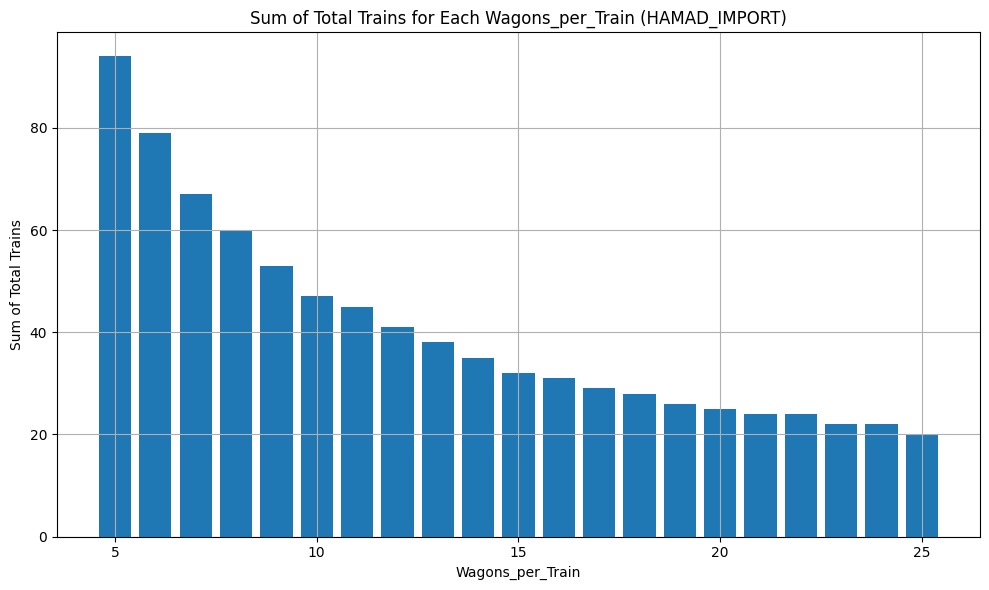

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(hamad_new['Wagons_per_Train'], hamad_new['Total_trains'])
plt.title('Sum of Total Trains for Each Wagons_per_Train (HAMAD_IMPORT)')
plt.xlabel('Wagons_per_Train')
plt.ylabel('Sum of Total Trains')
plt.grid(True)
plt.tight_layout()
plt.show()

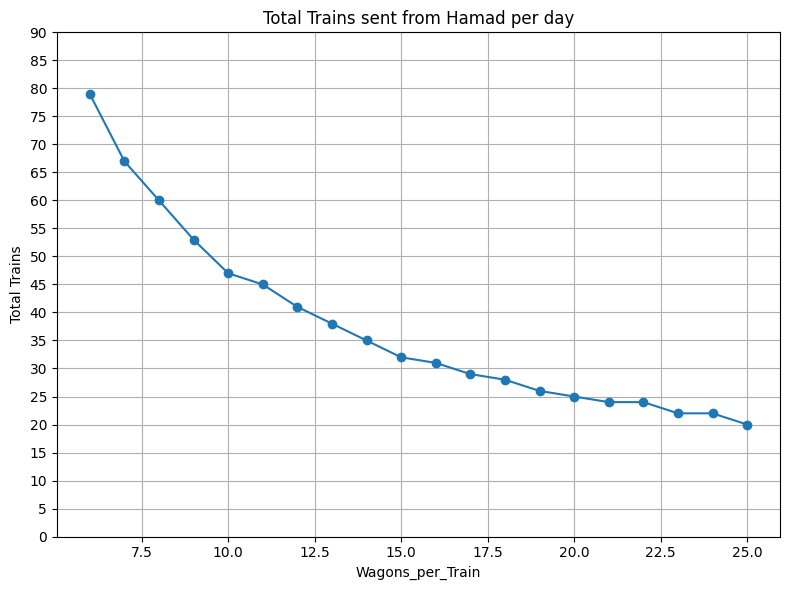

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(hamad_new['Wagons_per_Train'][1:], hamad_new['Total_trains'][1:], marker='o')
plt.title('Total Trains sent from Hamad per day')
plt.xlabel('Wagons_per_Train')
plt.ylabel('Total Trains')
plt.yticks(np.arange(0, max(hamad_new['Total_trains']), 5))
plt.grid(True)
plt.tight_layout()

plt.savefig('total_trains_hamad.jpg')
plt.show()

From the graph the optimal value of Wagons_per_Train is found to be 20 which results in 25 trains that needs to go from Hamad port

## Ruwais Import

In [ ]:
ruwais_new = ruwais_3_df.groupby('Wagons_per_Train')['Total_trains'].sum().reset_index()
ruwais_new

,Wagons_per_Train,Total_trains
0,5,11
1,6,9
2,7,8
3,8,7
4,9,7
5,10,7
6,11,7
7,12,6
8,13,6
9,14,6


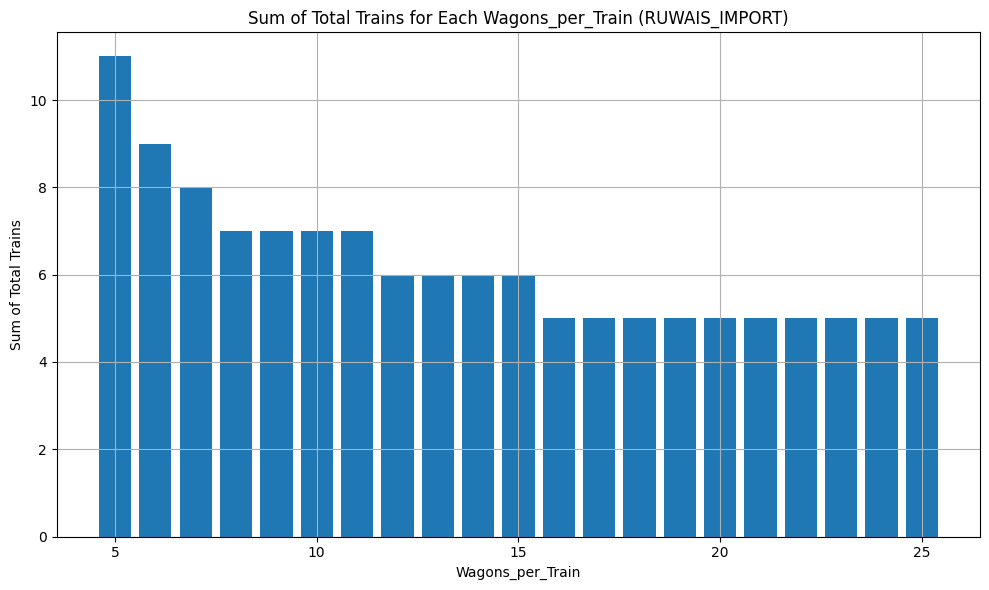

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(ruwais_new['Wagons_per_Train'], ruwais_new['Total_trains'])
plt.title('Sum of Total Trains for Each Wagons_per_Train (RUWAIS_IMPORT)')
plt.xlabel('Wagons_per_Train')
plt.ylabel('Sum of Total Trains')
plt.grid(True)
plt.tight_layout()
plt.show()

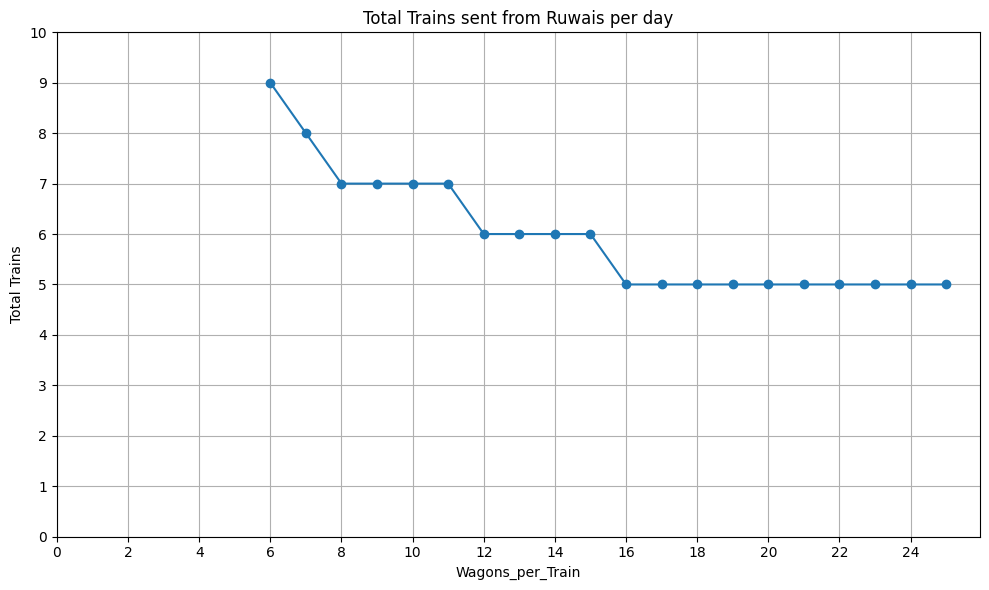

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(ruwais_new['Wagons_per_Train'][1:], ruwais_new['Total_trains'][1:], marker='o')
plt.title('Total Trains sent from Ruwais per day')
plt.xlabel('Wagons_per_Train')
plt.ylabel('Total Trains')
plt.yticks(np.arange(0, max(ruwais_new['Total_trains']), 1))
plt.xticks(np.arange(0, max(ruwais_new['Wagons_per_Train'])+1, 2))
plt.grid(True)
plt.tight_layout()
plt.savefig('total_trains_ruwais.jpg')
plt.show()

From this graph the optimal value of Wagons_per_Train is found to be 16 which results in 5 trains going from Ruwais Port

# EXPORT

In [ ]:
export_df = pd.DataFrame(columns=['TEU_per_wagon', 'Wagons_per_Train','Starting_Port','Final_Port','Port_Requirement','Total_trains'])

In [ ]:
startP=['Dry Port 1','Dry Port 2','Dry Port 3','Dry Port 4','Dry Port 1','Dry Port 2','Dry Port 3','Dry Port 4','Hamad Port']
finalP=['Hamad Port','Hamad Port','Hamad Port','Hamad Port','Ruwais Port','Ruwais Port','Ruwais Port','Ruwais Port','Ruwais Port']
PRequirement=[298.4520548, 405.0410959, 181.2027397, 53.29589041, 33.16164384, 45.00547945, 20.13424658, 5.920547945, 14.2109589]

In [ ]:
for j in range(2,4):
  for starting_port, final_port, port_req in zip(startP,finalP,PRequirement):
    for i in range(5,26):
      TEU_per_wagon=j
      Wagons_per_Train=i
      Starting_Port = starting_port
      Final_Port = final_port
      Port_Requirement = port_req

      Total_trains = math.ceil(Port_Requirement/((TEU_per_wagon)*(Wagons_per_Train)))

      data = {'TEU_per_wagon': TEU_per_wagon,
        'Wagons_per_Train': Wagons_per_Train,
        'Starting_Port': Starting_Port,
        'Final_Port': Final_Port,
        'Port_Requirement': Port_Requirement,
        'Total_trains': Total_trains}


      new_df = pd.DataFrame([data])


      export_df = pd.concat([export_df, new_df], ignore_index=True)

In [ ]:
export_df.tail(10)

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
368,3,16,Hamad Port,Ruwais Port,14.210959,1
369,3,17,Hamad Port,Ruwais Port,14.210959,1
370,3,18,Hamad Port,Ruwais Port,14.210959,1
371,3,19,Hamad Port,Ruwais Port,14.210959,1
372,3,20,Hamad Port,Ruwais Port,14.210959,1
373,3,21,Hamad Port,Ruwais Port,14.210959,1
374,3,22,Hamad Port,Ruwais Port,14.210959,1
375,3,23,Hamad Port,Ruwais Port,14.210959,1
376,3,24,Hamad Port,Ruwais Port,14.210959,1
377,3,25,Hamad Port,Ruwais Port,14.210959,1


In [ ]:
hamad_3_df =export_df[(export_df['Final_Port'] == 'Hamad Port') & (export_df['TEU_per_wagon'] == 3)]
ruwais_3_df = export_df[(export_df['Final_Port'] == 'Ruwais Port') & (export_df['TEU_per_wagon'] == 3)]

## Hamad Export

In [ ]:
hamad_new_ex = hamad_3_df.groupby('Wagons_per_Train')['Total_trains'].sum().reset_index()
hamad_new_ex

,Wagons_per_Train,Total_trains
0,5,65
1,6,54
2,7,47
3,8,41
4,9,37
5,10,33
6,11,31
7,12,29
8,13,26
9,14,25


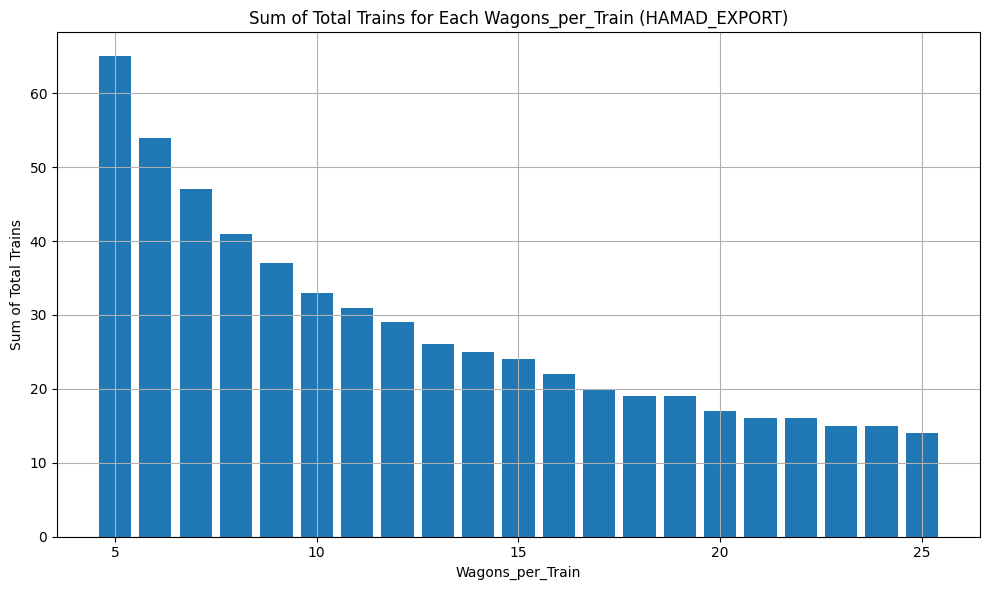

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(hamad_new_ex['Wagons_per_Train'], hamad_new_ex['Total_trains'])
plt.title('Sum of Total Trains for Each Wagons_per_Train (HAMAD_EXPORT)')
plt.xlabel('Wagons_per_Train')
plt.ylabel('Sum of Total Trains')
plt.grid(True)
plt.tight_layout()
plt.show()

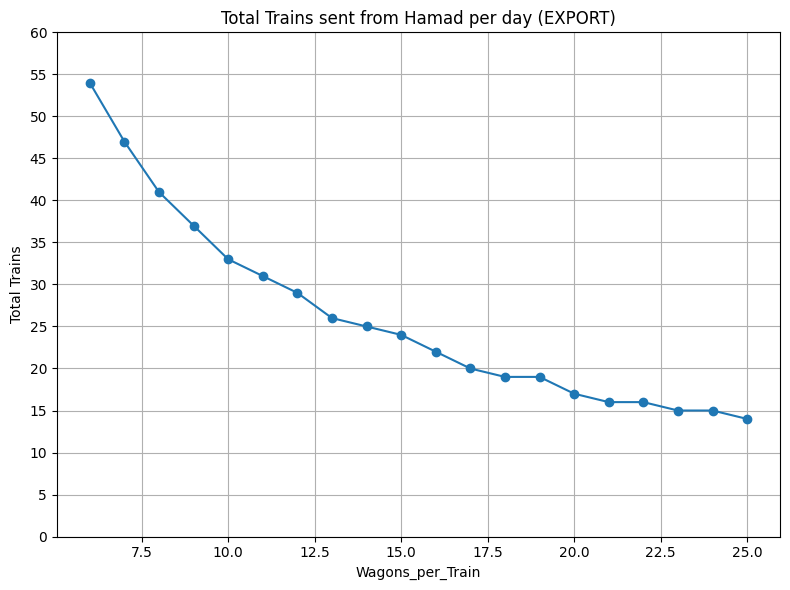

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(hamad_new_ex['Wagons_per_Train'][1:], hamad_new_ex['Total_trains'][1:], marker='o')
plt.title('Total Trains sent from Hamad per day (EXPORT)')
plt.xlabel('Wagons_per_Train')
plt.ylabel('Total Trains')
plt.yticks(np.arange(0, max(hamad_new_ex['Total_trains']), 5))
plt.grid(True)
plt.tight_layout()

plt.savefig('total_trains_hamad.png')
plt.show()

## Ruwais Export

In [ ]:
ruwais_new_ex = ruwais_3_df.groupby('Wagons_per_Train')['Total_trains'].sum().reset_index()
ruwais_new_ex

,Wagons_per_Train,Total_trains
0,5,11
1,6,9
2,7,8
3,8,7
4,9,7
5,10,7
6,11,7
7,12,6
8,13,6
9,14,6


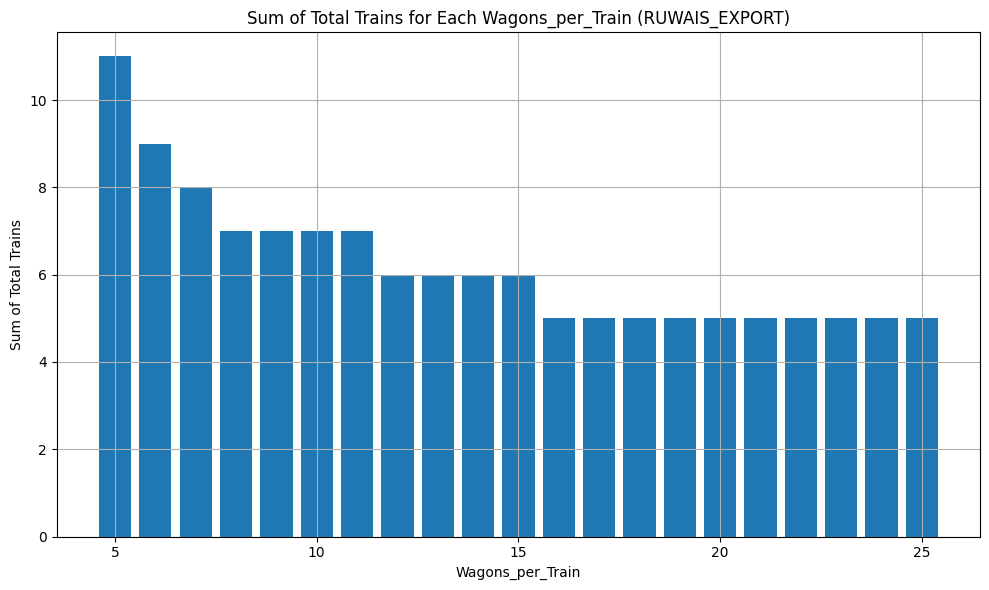

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(ruwais_new_ex['Wagons_per_Train'], ruwais_new_ex['Total_trains'])
plt.title('Sum of Total Trains for Each Wagons_per_Train (RUWAIS_EXPORT)')
plt.xlabel('Wagons_per_Train')
plt.ylabel('Sum of Total Trains')
plt.grid(True)
plt.tight_layout()
plt.show()

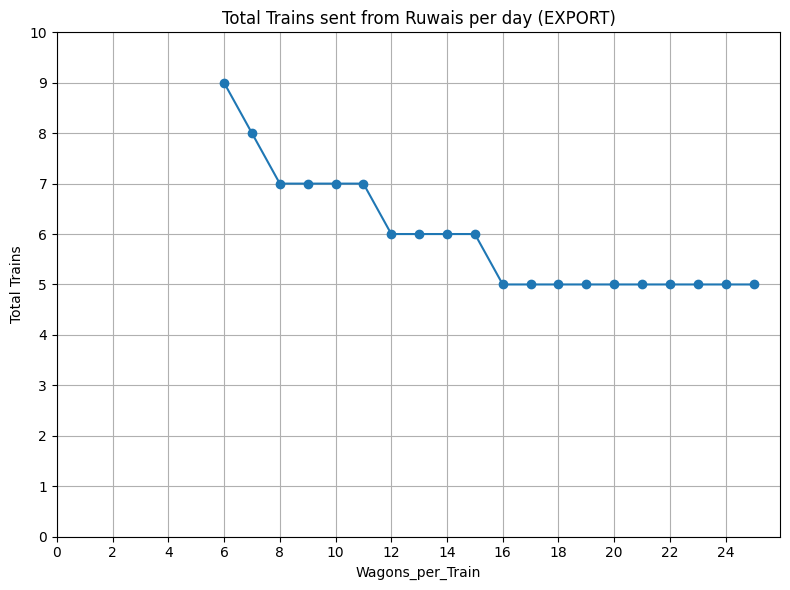

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(ruwais_new_ex['Wagons_per_Train'][1:], ruwais_new_ex['Total_trains'][1:], marker='o')
plt.title('Total Trains sent from Ruwais per day (EXPORT)')
plt.xlabel('Wagons_per_Train')
plt.ylabel('Total Trains')
plt.yticks(np.arange(0, max(ruwais_new_ex['Total_trains']), 1))
plt.xticks(np.arange(0, max(ruwais_new_ex['Wagons_per_Train'])+1, 2))
plt.grid(True)
plt.tight_layout()

plt.savefig('total_trains_hamad.png')
plt.show()

# TRAIN TIME CALCULATION (Distribution)


## LOADING


### **HAMAD**


In [ ]:
hamad_imp = pd.concat([import_df[(import_df['Starting_Port'] == 'Hamad Port') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 20)],
                       export_df[(export_df['Starting_Port'] == 'Hamad Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 16)]])

hamad_imp.reset_index(drop=True, inplace=True)
hamad_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Hamad Port,Dry Port 1,440.753425,8
1,3,20,Hamad Port,Dry Port 2,598.167123,10
2,3,20,Hamad Port,Dry Port 3,267.600000,5
3,3,20,Hamad Port,Dry Port 4,78.706849,2
4,3,16,Hamad Port,Ruwais Port,14.210959,1


In [ ]:
dist=[162.65,74.39,39.94,92.21,207.98]


In [ ]:
hamad_imp['Distance(km)']=dist

In [ ]:
speed=120

#### **Time for the trains to travel**


In [ ]:
hamad_imp['Time(min)_1_train']=(hamad_imp['Distance(km)']/speed)*60

In [ ]:
hamad_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains,Distance(km),Time(min)_1_train
0,3,20,Hamad Port,Dry Port 1,440.753425,8,162.65,81.325
1,3,20,Hamad Port,Dry Port 2,598.167123,10,74.39,37.195
2,3,20,Hamad Port,Dry Port 3,267.600000,5,39.94,19.970
3,3,20,Hamad Port,Dry Port 4,78.706849,2,92.21,46.105
4,3,16,Hamad Port,Ruwais Port,14.210959,1,207.98,103.990


In [ ]:
hamad_imp['Total_Time(min)']=hamad_imp['Time(min)_1_train']*hamad_imp['Total_trains']

In [ ]:
time=round(hamad_imp['Total_Time(min)'].sum()/60,2)
print('Total Time for trains to travel from Hamad port in 1 day (hours): ' + str(time))

Total Time for trains to travel from Hamad port in 1 day (hours): 21.98


Based on the Jacobs report here we have assumed equal number of 20 feet and 40 feet containers for loading and unloading time. <br><br>
A 20 wagon train can use upto 3 machines for loading and unloading at the same time.

Length of 1 wagon ~ 13.3m <br>
Length of 20 wagons ~ 270m <br>

According to the Jacobs report each machine can work at a length of 100m. Hence 3 machines can be used for 20 wagon train. But for 16 wagon train only 2 machines can be used.

#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time=hamad_imp['Total_Time(min)'].sum()+ 75*25 + 60*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Hamad port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Hamad port in 1 day (hours) considering loading time: 54.23


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=hamad_imp['Total_Time(min)'].sum()+ 37.5*25 + 30*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Hamad port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Hamad port in 1 day (hours) considering loading time: 38.1


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.34 mins <br><br>
Total = 37.34 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=hamad_imp['Total_Time(min)'].sum()+ 25*25 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Hamad port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Hamad port in 1 day (hours) considering loading time: 32.73


#### **4 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/4 mins = 18.75 mins <br>
Unloading Time = 65/4 mins = 16.25 mins <br><br>
Total = 35 mins using 4 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.34 mins <br><br>
Total = 37.34 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=hamad_imp['Total_Time(min)'].sum()+ 18.75*25 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Hamad port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Hamad port in 1 day (hours) considering loading time: 30.12


#### **Loading 2 trains at the same time**

In [ ]:
time=hamad_imp['Total_Time(min)'].sum()+ (18.75*25)/2 + 20*1 + 2*(2-1)*(math.ceil((26/2)))                     ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Hamad port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Hamad port in 1 day (hours) considering loading time: 26.65


#### **Loading 3 trains at the same time**

In [ ]:
time=hamad_imp['Total_Time(min)'].sum()+ (18.75*25)/3 + 20*1 + 2*(3-1)*(math.ceil((26/3)))                     ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Hamad port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Hamad port in 1 day (hours) considering loading time: 25.51


#### **Loading 4 trains at the same time**

In [ ]:
time=hamad_imp['Total_Time(min)'].sum()+ (18.75*25)/4 + 20*1 + 2*(4-1)*(math.ceil((26/4)))                    ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Hamad port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Hamad port in 1 day (hours) considering loading time: 24.96


### **RUWAIS**


In [ ]:
ruwais_imp = pd.concat([import_df[(import_df['Starting_Port'] == 'Ruwais Port') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 16)],
                       export_df[(export_df['Starting_Port'] == 'Ruwais Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 16)]])

ruwais_imp.reset_index(drop=True, inplace=True)
ruwais_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,16,Ruwais Port,Dry Port 1,33.175342,1
1,3,16,Ruwais Port,Dry Port 2,45.021918,1
2,3,16,Ruwais Port,Dry Port 3,20.142466,1
3,3,16,Ruwais Port,Dry Port 4,5.923298,1
4,3,16,Ruwais Port,Hamad Port,14.219178,1


In [ ]:
dist=[45.33, 133.59, 168.04, 115.77, 207.98]

In [ ]:
ruwais_imp['Distance(km)']=dist

In [ ]:
speed=120

#### **Time for the trains to travel**


In [ ]:
ruwais_imp['Time(min)_1_train']=(ruwais_imp['Distance(km)']/speed)*60

In [ ]:
ruwais_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains,Distance(km),Time(min)_1_train
0,3,16,Ruwais Port,Dry Port 1,33.175342,1,45.33,22.665
1,3,16,Ruwais Port,Dry Port 2,45.021918,1,133.59,66.795
2,3,16,Ruwais Port,Dry Port 3,20.142466,1,168.04,84.020
3,3,16,Ruwais Port,Dry Port 4,5.923298,1,115.77,57.885
4,3,16,Ruwais Port,Hamad Port,14.219178,1,207.98,103.990


In [ ]:
ruwais_imp['Total_Time(min)']=ruwais_imp['Time(min)_1_train']*ruwais_imp['Total_trains']

In [ ]:
time=round(ruwais_imp['Total_Time(min)'].sum()/60,2)
print('Total Time for trains to travel from Ruwais port in 1 day (hours): ' + str(time))

Total Time for trains to travel from Ruwais port in 1 day (hours): 5.59


#### **1 Machine for Loading and Unloading**

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time=ruwais_imp['Total_Time(min)'].sum()+ 60*5                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Ruwais port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Ruwais port in 1 day (hours) considering loading time: 10.59


#### **2 Machines for Loading and Unloading**

**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=ruwais_imp['Total_Time(min)'].sum()+ 30*5                     ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Ruwais port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Ruwais port in 1 day (hours) considering loading time: 8.09


#### **3 Machines for Loading and Unloading**

**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/2 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=ruwais_imp['Total_Time(min)'].sum()+ 20*5                     ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Ruwais port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Ruwais port in 1 day (hours) considering loading time: 7.26


#### **Loading 2 trains at the same time**

In [ ]:
time=ruwais_imp['Total_Time(min)'].sum()+ (20*5)/2 +  2*(2-1)*(math.ceil((5/2)))                    ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Ruwais port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Ruwais port in 1 day (hours) considering loading time: 6.52


#### **Loading 3 trains at the same time**

In [ ]:
time=ruwais_imp['Total_Time(min)'].sum()+ (20*5)/3 + 2*(3-1)*(math.ceil((5/3)))                   ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Ruwais port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Ruwais port in 1 day (hours) considering loading time: 6.28


#### **Loading 4 trains at the same time**

In [ ]:
time=ruwais_imp['Total_Time(min)'].sum()+ (20*5)/4 + 2*(4-1)*(math.ceil((5/4)))                   ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Ruwais port in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Ruwais port in 1 day (hours) considering loading time: 6.21


### **DRY PORT 1**

In [ ]:
dp1_imp = pd.concat([export_df[(export_df['Starting_Port'] == 'Dry Port 1') & (export_df['Final_Port'] == 'Hamad Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 20)],
                       export_df[(export_df['Starting_Port'] == 'Dry Port 1') & (export_df['Final_Port'] == 'Ruwais Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 16)]])


dp1_imp.reset_index(drop=True, inplace=True)
dp1_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Dry Port 1,Hamad Port,298.452055,5
1,3,16,Dry Port 1,Ruwais Port,33.161644,1


In [ ]:
dist=[162.65,45.33]

In [ ]:
dp1_imp['Distance(km)']=dist

In [ ]:
speed=120

#### **Time for the trains to travel**


In [ ]:
dp1_imp['Time(min)_1_train']=(dp1_imp['Distance(km)']/speed)*60

In [ ]:
dp1_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains,Distance(km),Time(min)_1_train
0,3,20,Dry Port 1,Hamad Port,298.452055,5,162.65,81.325
1,3,16,Dry Port 1,Ruwais Port,33.161644,1,45.33,22.665


In [ ]:
dp1_imp['Total_Time(min)']=dp1_imp['Time(min)_1_train']*dp1_imp['Total_trains']

In [ ]:
time=round(dp1_imp['Total_Time(min)'].sum()/60,2)
print('Total Time for trains to travel from Dry Port 1 port in 1 day (hours): ' + str(time))

Total Time for trains to travel from Dry Port 1 port in 1 day (hours): 7.15


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time=dp1_imp['Total_Time(min)'].sum()+ 75*5 + 60*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: 14.4


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=dp1_imp['Total_Time(min)'].sum()+ 37.5*5 + 30*1                     ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: 10.78


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=dp1_imp['Total_Time(min)'].sum() + 25*5 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: 9.57


#### **4 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/4 mins = 18.75 mins <br>
Unloading Time = 65/4 mins = 16.25 mins <br><br>
Total = 35 mins using 4 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=dp1_imp['Total_Time(min)'].sum() + 18.75*5 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: 9.05


#### **Loading 2 trains at the same time**

In [ ]:
time=dp1_imp['Total_Time(min)'].sum()+ (18.75*5)/2 + 20*1 + 2*(2-1)*(math.ceil((6/2)))                        ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: 8.37


### **DRY PORT 2**

In [ ]:
dp2_imp = pd.concat([export_df[(export_df['Starting_Port'] == 'Dry Port 2') & (export_df['Final_Port'] == 'Hamad Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 20)],
                       export_df[(export_df['Starting_Port'] == 'Dry Port 2') & (export_df['Final_Port'] == 'Ruwais Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 16)]])


dp2_imp.reset_index(drop=True, inplace=True)
dp2_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Dry Port 2,Hamad Port,405.041096,7
1,3,16,Dry Port 2,Ruwais Port,45.005479,1


In [ ]:
dist=[74.39,133.59]

In [ ]:
dp2_imp['Distance(km)']=dist

In [ ]:
speed=120

#### **Time for the trains to travel**


In [ ]:
dp2_imp['Time(min)_1_train']=(dp2_imp['Distance(km)']/speed)*60

In [ ]:
dp2_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains,Distance(km),Time(min)_1_train
0,3,20,Dry Port 2,Hamad Port,405.041096,7,74.39,37.195
1,3,16,Dry Port 2,Ruwais Port,45.005479,1,133.59,66.795


In [ ]:
dp2_imp['Total_Time(min)']=dp2_imp['Time(min)_1_train']*dp2_imp['Total_trains']

In [ ]:
time=round(dp2_imp['Total_Time(min)'].sum()/60,2)
print('Total Time for trains to travel from Dry Port 2 port in 1 day (hours): ' + str(time))

Total Time for trains to travel from Dry Port 2 port in 1 day (hours): 5.45


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time=dp2_imp['Total_Time(min)'].sum()+ 75*7 + 60*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 2 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 2 in 1 day (hours) considering loading time: 15.2


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=dp2_imp['Total_Time(min)'].sum()+ 37.5*7 + 30*1                     ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 2 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 2 in 1 day (hours) considering loading time: 10.33


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>

**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=dp2_imp['Total_Time(min)'].sum() + 25*7 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 2 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 2 in 1 day (hours) considering loading time: 8.7


#### **4 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/4 mins = 18.75 mins <br>
Unloading Time = 65/4 mins = 16.25 mins <br><br>
Total = 35 mins using 4 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=dp2_imp['Total_Time(min)'].sum() + 18.75*7 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 2 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 2 in 1 day (hours) considering loading time: 7.97


#### **Loading 2 trains at the same time**

In [ ]:
time=dp2_imp['Total_Time(min)'].sum()+ (18.75*7)/2 + 20*1 + 2*(2-1)*(math.ceil((8/2)))                        ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 1 in 1 day (hours) considering loading time: 7.01


### **DRY PORT 3**

In [ ]:
dp3_imp = pd.concat([export_df[(export_df['Starting_Port'] == 'Dry Port 3') & (export_df['Final_Port'] == 'Hamad Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 20)],
                       export_df[(export_df['Starting_Port'] == 'Dry Port 3') & (export_df['Final_Port'] == 'Ruwais Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 16)]])

dp3_imp.reset_index(drop=True, inplace=True)
dp3_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Dry Port 3,Hamad Port,181.202740,4
1,3,16,Dry Port 3,Ruwais Port,20.134247,1


In [ ]:
dist=[39.94, 168.04]

In [ ]:
dp3_imp['Distance(km)']=dist

In [ ]:
speed=120

#### **Time for the trains to travel**


In [ ]:
dp3_imp['Time(min)_1_train']=(dp3_imp['Distance(km)']/speed)*60

In [ ]:
dp3_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains,Distance(km),Time(min)_1_train
0,3,20,Dry Port 3,Hamad Port,181.202740,4,39.94,19.97
1,3,16,Dry Port 3,Ruwais Port,20.134247,1,168.04,84.02


In [ ]:
dp3_imp['Total_Time(min)']=dp3_imp['Time(min)_1_train']*dp3_imp['Total_trains']

In [ ]:
time=round(dp3_imp['Total_Time(min)'].sum()/60,2)
print('Total Time for trains to travel from Dry Port 3 port in 1 day (hours): ' + str(time))

Total Time for trains to travel from Dry Port 3 port in 1 day (hours): 2.73


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time=dp3_imp['Total_Time(min)'].sum()+ 75*4 + 60*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: 8.73


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=dp3_imp['Total_Time(min)'].sum()+ 37.5*4 + 30*1                     ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: 5.73


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=dp3_imp['Total_Time(min)'].sum() + 25*4 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: 4.73


#### **4 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/4 mins = 18.75 mins <br>
Unloading Time = 65/4 mins = 16.25 mins <br><br>
Total = 35 mins using 4 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=dp3_imp['Total_Time(min)'].sum() + 18.75*4 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: 4.31


#### **Loading 2 trains at the same time**

In [ ]:
time=dp3_imp['Total_Time(min)'].sum()+ (18.75*4)/2 + 20*1 + 2*(2-1)*(math.ceil((5/2)))                       ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 3 in 1 day (hours) considering loading time: 3.79


### **DRY PORT 4**

In [ ]:
dp4_imp = pd.concat([export_df[(export_df['Starting_Port'] == 'Dry Port 4') & (export_df['Final_Port'] == 'Hamad Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 20)],
                       export_df[(export_df['Starting_Port'] == 'Dry Port 4') & (export_df['Final_Port'] == 'Ruwais Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 16)]])


dp4_imp.reset_index(drop=True, inplace=True)
dp4_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Dry Port 4,Hamad Port,53.295890,1
1,3,16,Dry Port 4,Ruwais Port,5.920548,1


In [ ]:
dist=[92.21,115.77]

In [ ]:
dp4_imp['Distance(km)']=dist

In [ ]:
speed=120

#### **Time for the trains to travel**


In [ ]:
dp4_imp['Time(min)_1_train']=(dp4_imp['Distance(km)']/speed)*60

In [ ]:
dp4_imp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains,Distance(km),Time(min)_1_train
0,3,20,Dry Port 4,Hamad Port,53.295890,1,92.21,46.105
1,3,16,Dry Port 4,Ruwais Port,5.920548,1,115.77,57.885


In [ ]:
dp4_imp['Total_Time(min)']=dp4_imp['Time(min)_1_train']*dp4_imp['Total_trains']

In [ ]:
time=round(dp4_imp['Total_Time(min)'].sum()/60,2)
print('Total Time for trains to travel from Dry Port 4 port in 1 day (hours): ' + str(time))

Total Time for trains to travel from Dry Port 4 port in 1 day (hours): 1.73


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time=dp4_imp['Total_Time(min)'].sum()+ 75*1 + 60*1                      ###Considering only Loading time
time= time/60
print('Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: 3.983166666666667


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=dp4_imp['Total_Time(min)'].sum()+ 37.5*1 + 30*1                     ###Considering only Loading time
time= time/60
print('Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: 2.858166666666667


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=dp4_imp['Total_Time(min)'].sum() + 25*1 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: 2.48


#### **4 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/4 mins = 18.75 mins <br>
Unloading Time = 65/4 mins = 16.25 mins <br><br>
Total = 35 mins using 4 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=dp4_imp['Total_Time(min)'].sum() + 18.75*1 + 20*1                      ###Considering only Loading time
time= round(time/60,2)
print('Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: 2.38


#### **Loading 2 trains at the same time**

In [ ]:
time=dp4_imp['Total_Time(min)'].sum()+ (20*1)/2 + 2*(2-1)*(math.ceil((2/2)))                      ###Considering only Loading time and buffer time
time= round(time/60,2)
print('Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: ' + str(time))

Total Time for trains from Dry Port 4 in 1 day (hours) considering loading time: 1.93


## UNLOADING

This sections focuses purely on the time each port takes to unload containers from trains that have arrived.

### **HAMAD**

In [ ]:
hamad_exp = pd.concat([import_df[(import_df['Final_Port'] == 'Hamad Port')  & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 16)],
                       export_df[(export_df['Final_Port'] == 'Hamad Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 20)]])


hamad_exp.reset_index(drop=True, inplace=True)
hamad_exp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,16,Ruwais Port,Hamad Port,14.219178,1
1,3,20,Dry Port 1,Hamad Port,298.452055,5
2,3,20,Dry Port 2,Hamad Port,405.041096,7
3,3,20,Dry Port 3,Hamad Port,181.202740,4
4,3,20,Dry Port 4,Hamad Port,53.295890,1


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time= 65*17 + 52*1
time= round(time/60,2)
print('Total Time for unloading containers in Hamad Port (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Hamad Port (hours) in 1 day: 19.28


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=32.5*17 + 30*1
time= round(time/60,2)
print('Total Time for unloading containers in Hamad Port (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Hamad Port (hours) in 1 day: 9.71


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>

**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time= 21.67*17 + 17.3*1
time= round(time/60,2)
print('Total Time for unloading containers in Hamad Port (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Hamad Port (hours) in 1 day: 6.43


#### **4 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/4 mins = 18.75 mins <br>
Unloading Time = 65/4 mins = 16.25 mins <br><br>
Total = 35 mins using 4 reachstacker (loading unloading machine)<br><br>

**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time= 16.25*17 + 17.3*1
time= round(time/60,2)
print('Total Time for unloading containers in Hamad Port (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Hamad Port (hours) in 1 day: 4.89


#### **Unloading 2 trains at the same time**

In [ ]:
time=(16.25*17)/2 + 17.3*1
time= round(time/60,2)
print('Total Time for unloading containers in Hamad Port in 1 day (hours): ' + str(time))

Total Time for unloading containers in Hamad Port in 1 day (hours): 2.59


#### **Unloading 3 trains at the same time**

In [ ]:
time=(21.67*17)/3 + 26*1 + 10*((18/3)-1)
time= round(time/60,2)
print('Total Time for unloading containers in Hamad Port in 1 day (hours): ' + str(time))

Total Time for unloading containers in Hamad Port in 1 day (hours): 3.31


#### **Unloading 4 trains at the same time**

In [ ]:
time=(16.25*17)/4 + 17.3*1
time= round(time/60,2)
print('Total Time for unloading containers in Hamad Port in 1 day (hours): ' + str(time))

Total Time for unloading containers in Hamad Port in 1 day (hours): 1.44


### **RUWAIS**

In [ ]:
ruwais_exp = pd.concat([export_df[(export_df['Starting_Port'] != 'Hamad Port') & (export_df['Final_Port'] == 'Ruwais Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 16)],
                       export_df[(export_df['Starting_Port'] == 'Hamad Port') & (export_df['Final_Port'] == 'Ruwais Port') & (export_df['TEU_per_wagon'] == 3) & (export_df['Wagons_per_Train'] == 16)]])

ruwais_exp.reset_index(drop=True, inplace=True)
ruwais_exp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,16,Dry Port 1,Ruwais Port,33.161644,1
1,3,16,Dry Port 2,Ruwais Port,45.005479,1
2,3,16,Dry Port 3,Ruwais Port,20.134247,1
3,3,16,Dry Port 4,Ruwais Port,5.920548,1
4,3,16,Hamad Port,Ruwais Port,14.210959,1


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time= 52*5
time= round(time/60)
print('Total Time for unloading containers in Ruwais Port (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Ruwais Port (hours) in 1 day: 4


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=26*5
time= round(time/60,2)
print('Total Time for unloading containers in Ruwais Port (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Ruwais Port (hours) in 1 day: 2.17


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/4 mins = 18.75 mins <br>
Unloading Time = 65/3 mins = 16.25 mins <br><br>
Total = 35 mins using 4 reachstacker (loading unloading machine)<br><br>

**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time=17.3*5
time= round(time/60,2)
print('Total Time for unloading containers in Ruwais Port (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Ruwais Port (hours) in 1 day: 1.44


#### **Unloading 2 trains at the same time**

In [ ]:
time= (17.3*5)/2
time= round(time/60,2)
print('Total Time for unloading containers in Ruwais Port in 1 day (hours): ' + str(time))

Total Time for unloading containers in Ruwais Port in 1 day (hours): 0.72


#### **Unloading 3 trains at the same time**

In [ ]:
time=(17.3*5)/3
time= round(time/60,2)
print('Total Time for unloading containers in Ruwais Port in 1 day (hours): ' + str(time))

Total Time for unloading containers in Ruwais Port in 1 day (hours): 0.48


#### **Unloading 4 trains at the same time**

In [ ]:
time=(17.3*5)/4
time= round(time/60,2)
print('Total Time for unloading containers in Ruwais Port in 1 day (hours): ' + str(time))

Total Time for unloading containers in Ruwais Port in 1 day (hours): 0.36


### **DRY PORT 1**

In [ ]:
dp1_exp = pd.concat([import_df[(import_df['Starting_Port'] == 'Hamad Port') & (import_df['Final_Port'] == 'Dry Port 1') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 20)],
                       import_df[(import_df['Starting_Port'] == 'Ruwais Port') & (import_df['Final_Port'] == 'Dry Port 1') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 16)]])


dp1_exp.reset_index(drop=True, inplace=True)
dp1_exp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Hamad Port,Dry Port 1,440.753425,8
1,3,16,Ruwais Port,Dry Port 1,33.175342,1


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time= 65*8 + 52*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 1 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 1 (hours) in 1 day: 9.53


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=32.5*8 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 1 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 1 (hours) in 1 day: 4.77


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time= 21.67*8 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 1 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 1 (hours) in 1 day: 3.32


In [ ]:
time= 21.67*8 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 1 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 1 (hours) in 1 day: 3.32


#### **Unloading 2 trains at the same time**

In [ ]:
time=(16.25*8)/2 + 17.3*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 1 in 1 day (hours): ' + str(time))

Total Time for unloading containers in Dry Port 1 in 1 day (hours): 1.37


### **DRY PORT 2**

In [ ]:
dp2_exp = pd.concat([import_df[(import_df['Starting_Port'] == 'Hamad Port') & (import_df['Final_Port'] == 'Dry Port 2') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 20)],
                       import_df[(import_df['Starting_Port'] == 'Ruwais Port') & (import_df['Final_Port'] == 'Dry Port 2') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 16)]])


dp2_exp.reset_index(drop=True, inplace=True)
dp2_exp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Hamad Port,Dry Port 2,598.167123,10
1,3,16,Ruwais Port,Dry Port 2,45.021918,1


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time= 65*10 + 52*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 2 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 2 (hours) in 1 day: 11.7


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=32.5*10 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 2 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 2 (hours) in 1 day: 5.85


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time= 21.67*10 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 2 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 2 (hours) in 1 day: 4.04


#### **Unloading 2 trains at the same time**

In [ ]:
time=(16.25*10)/2 + 17.3*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 2 in 1 day (hours): ' + str(time))

Total Time for unloading containers in Dry Port 2 in 1 day (hours): 1.64


### **DRY PORT 3**

In [ ]:
dp3_exp = pd.concat([import_df[(import_df['Starting_Port'] == 'Hamad Port') & (import_df['Final_Port'] == 'Dry Port 3') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 20)],
                       import_df[(import_df['Starting_Port'] == 'Ruwais Port') & (import_df['Final_Port'] == 'Dry Port 3') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 16)]])


dp3_exp.reset_index(drop=True, inplace=True)
dp3_exp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Hamad Port,Dry Port 3,267.600000,5
1,3,16,Ruwais Port,Dry Port 3,20.142466,1


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time= 65*5 + 52*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 3 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 3 (hours) in 1 day: 6.28


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=32.5*5 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 3 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 3 (hours) in 1 day: 3.14


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time= 21.67*5 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 3 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 3 (hours) in 1 day: 2.24


#### **Unloading 2 trains at the same time**

In [ ]:
time=(16.25*5)/2 + 17.3*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 3 in 1 day (hours): ' + str(time))

Total Time for unloading containers in Dry Port 3 in 1 day (hours): 0.97


### **DRY PORT 4**

In [ ]:
dp4_exp = pd.concat([import_df[(import_df['Starting_Port'] == 'Hamad Port') & (import_df['Final_Port'] == 'Dry Port 4') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 20)],
                       import_df[(import_df['Starting_Port'] == 'Ruwais Port') & (import_df['Final_Port'] == 'Dry Port 4') & (import_df['TEU_per_wagon'] == 3) & (import_df['Wagons_per_Train'] == 16)]])


dp4_exp.reset_index(drop=True, inplace=True)
dp4_exp

,TEU_per_wagon,Wagons_per_Train,Starting_Port,Final_Port,Port_Requirement,Total_trains
0,3,20,Hamad Port,Dry Port 4,78.706849,2
1,3,16,Ruwais Port,Dry Port 4,5.923298,1


#### **1 Machine for Loading and Unloading**

**For 20 wagon train** <br>
Load 20 x 20’ = 20*1.75 min = 35 mins<br>
Load 20 x 40’ = 20*2 min = 40 mins<br>
Unload 20 x 20’ = 20*1.5 min = 30 mins<br>
Unload 20 x 40’ = 20*1.75 min = 35 mins<br>
<br>
Total = 140 mins, or 2 hours and 20 mins using 1 reachstacker (loading unloading machine)<br>
Loading Time = 75 mins <br>
Unloading Time = 65 mins <br><br>

**For 16 wagon train** <br>
Load 16 x 20’ = 16*1.75 min = 28 mins<br>
Load 16 x 40’ = 16*2 min = 32 mins<br>
Unload 16 x 20’ = 16*1.5 min = 24 mins<br>
Unload 16 x 40’ = 16*1.75 min = 28 mins<br>
<br>
Total = 112 mins, or 1 hour and 52 mins using 1 reachstacker (loading unloading machine)<br>

Loading time = 60 mins<br>
Unloading time = 52 mins


In [ ]:
time= 65*2 + 52*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 4 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 4 (hours) in 1 day: 3.03


#### **2 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/2 mins = 37.5 mins <br>
Unloading Time = 65/2 mins = 32.5 mins <br><br>
Total = 70 mins, or 1 hour and 10 mins using 2 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/2 mins = 30 mins <br>
Unloading Time = 52/2 mins = 26 mins <br><br>
Total = 56 mins using 2 reachstacker (loading unloading machine)

In [ ]:
time=32.5*2 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 4 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 4 (hours) in 1 day: 1.52


#### **3 Machines for Loading and Unloading**

**For 20 wagon train** <br>
Loading Time = 75/3 mins = 25 mins <br>
Unloading Time = 65/3 mins = 21.67 mins <br><br>
Total = 46.67 mins using 3 reachstacker (loading unloading machine)<br><br>


**For 16 wagon train** <br>
Loading Time = 60/3 mins = 20 mins <br>
Unloading Time = 52/3 mins = 17.3 mins <br><br>
Total = 37.3 mins using 3 reachstacker (loading unloading machine)

In [ ]:
time= 21.67*2 + 26*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 4 (hours) in 1 day: ' + str(time))

Total Time for unloading containers in Dry Port 4 (hours) in 1 day: 1.16


#### **Unloading 2 trains at the same time**

In [ ]:
time=(16.25*2)/2 + 17.3*1
time= round(time/60,2)
print('Total Time for unloading containers in Dry Port 4 in 1 day (hours): ' + str(time))

Total Time for unloading containers in Dry Port 4 in 1 day (hours): 0.56


# TRAIN TIME CALCULATION (Distribution to Saudi)

We are assuming that containers arriving from Saudi Arabia (import to Qatar) are being unloaded in Hamad Port and from there it is being distributed to the Dry Port.<br>
Similarly containers to be exported from Qatar are also loaded from Hamad Port and sent to Saudi Arabia. <br>

Based of the container distribution calculation:<br><br>

IMPORT (i.e., coming from Saudi Arabia)  
3% of 617,800 import TEUs -> 18535 TEUs are imported to Qatar from Saudi Arabia<br><br>

EXPORT (i.e., going to Saudi Arabia)

2% of 432,280 -> 8,645 TEUs are exported from Qatar to Saudi Arabia<br><br>

## Qatar to Saudi (Loading)

Assuming train with 20 wagons with each wagon capable of carry 3 TEUs is used to transport cargo to Saudi.

In [ ]:
export_teu= 8645/365
TEU_per_wagon = 3
wagons= 8

train_no=math.ceil(export_teu/(TEU_per_wagon*wagons))
print('Total trains required to transport cargo from Qatar to Saudi Arabia: ' + str(train_no))

distance=78.52
speed=120
travel_time=distance/speed

print('Travel time for train: ' + str(travel_time))

total_time=travel_time+(25/60)
print('Total time: '+ str(total_time))

Total trains required to transport cargo from Qatar to Saudi Arabia: 1
Travel time for train: 0.6543333333333333
Total time: 1.071


# Saudi to Qatar (Unloading)

Assuming train with 20 wagons with each wagon capable of carry 3 TEUs is used to transport cargo to Saudi from Qatar

In [ ]:
import_teu=18535/365
TEU_per_wagon = 3
wagons= 17
train_no=math.ceil(import_teu/(TEU_per_wagon*wagons))
print('Total trains required to transport cargo from Saudi Arabia to Qatar: ' + str(train_no))


Total trains required to transport cargo from Saudi Arabia to Qatar: 1
